In [1]:
import warnings
warnings.filterwarnings('ignore')

# Introduction

# Model

In [2]:
from model import create_model
from config import NUM_CLASSES


model = create_model(NUM_CLASSES)
type(model)

torchvision.models.detection.ssd.SSD

# Dataset

In [3]:
from datasets import SingLanguageDataset
from torch.utils.data import DataLoader
from config import TRAIN_DIR, TEST_DIR, VALID_DIR, BATCH_SIZE
from utils import Utils


train_ds = SingLanguageDataset(TRAIN_DIR, Utils.train_transforms())
train_loader = DataLoader(train_ds, batch_size= BATCH_SIZE, shuffle= True, num_workers= 3)

test_ds = SingLanguageDataset(TEST_DIR, Utils.test_transforms())
test_loader = DataLoader(test_ds, batch_size= BATCH_SIZE, shuffle= False, num_workers= 3)

# Visualize data augmentation

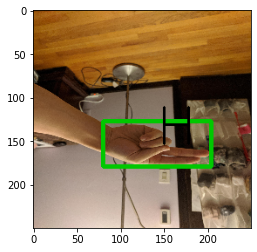

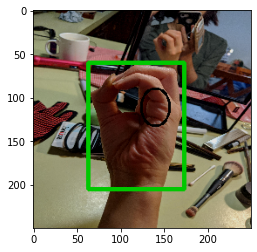

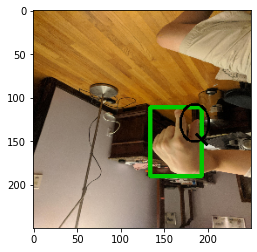

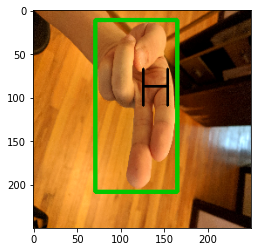

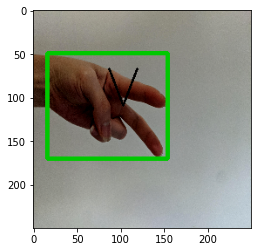

In [4]:
from utils import Utils

Utils.visualize_data(train_loader)

# Train the model

In [5]:
from config import NUM_EPOCHS
from engine import train
import torch

train_loss_list = train(model, train_loader, NUM_EPOCHS, early_stopping = True, patience = 10)

In [6]:
import json
with open('train_list.txt', 'w') as f:
    f.write(json.dumps(train_loss_list))
    f.close()

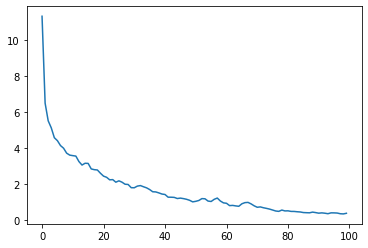

In [7]:
import matplotlib.pyplot as plt

plt.plot(train_loss_list)
plt.show()

['X24.jpg', 'S0.jpg', 'H5.jpg', 'W7.jpg', 'W16.jpg', 'R5.jpg', 'K12.jpg', 'W19.jpg', 'K24.jpg', 'J27.jpg', 'X9.jpg', 'N6.jpg', 'U6.jpg', 'Z18.jpg', 'W24.jpg', 'R18.jpg', 'M14.jpg', 'F3.jpg', 'B15.jpg', 'I17.jpg', 'S16.jpg', 'Z9.jpg', 'G3.jpg', 'K6.jpg', 'V27.jpg', 'G7.jpg', 'Q7.jpg', 'P24.jpg', 'Z27.jpg', 'V2.jpg', 'W23.jpg', 'T24.jpg', 'Q10.jpg', 'N9.jpg', 'V12.jpg', 'T17.jpg', 'G4.jpg', 'H25.jpg', 'Z16.jpg', 'T18.jpg', 'G20.jpg', 'N22.jpg', 'M20.jpg', 'C23.jpg', 'O4.jpg', 'S6.jpg', 'D1.jpg', 'Y25.jpg', 'X20.jpg', 'U5.jpg', 'T1.jpg', 'C22.jpg', 'O20.jpg', 'C17.jpg', 'I28.jpg', 'T13.jpg', 'B14.jpg', 'H19.jpg', 'X14.jpg', 'G11.jpg', 'O12.jpg', 'M24.jpg', 'F17.jpg', 'A22.jpg', 'C19.jpg', 'Y5.jpg', 'J28.jpg', 'K13.jpg', 'B19.jpg', 'J6.jpg', 'J9.jpg', 'V10.jpg']


/home/mounta/Bureau/Personal repositories/Projects/Computer Vision/Object Detection/signLanguage/.venv/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


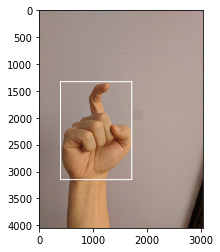

X


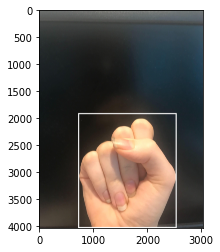

T


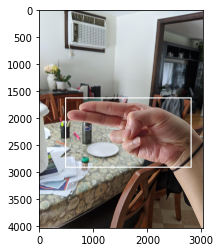

H


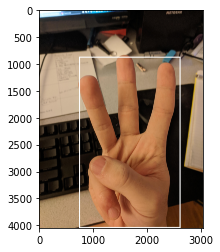

W


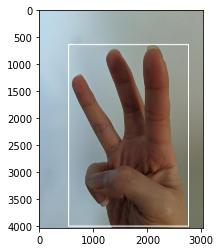

W


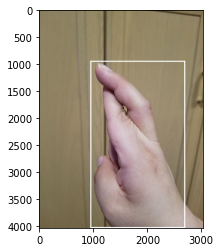

U


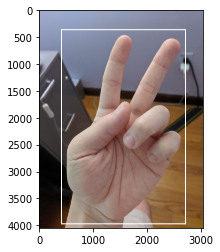

K


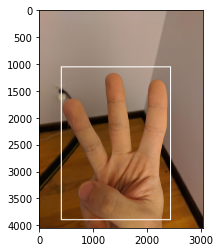

W


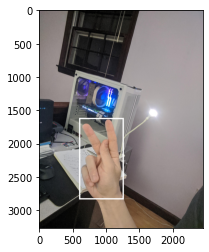

K


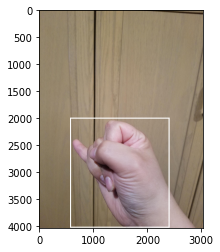

J


In [1]:
import torch, os
from config import TEST_DIR
from PIL import Image
import numpy as np
from torchvision import transforms as T


model = torch.load("model_final.pth")
model.eval()



img_dir = os.path.join(TEST_DIR, "images")
images = os.listdir(img_dir)
print(images)

for idx in range(10):
    img_path = os.path.join(img_dir, images[idx])

    image = Image.open(img_path)
    img = T.ToTensor()(image)

    inputs = [img]
    prediction = model(inputs)

    box = prediction[0]['boxes'][0]
    label = prediction[0]['labels'][0]
    xmin, ymin, xmax, ymax = box


    from PIL import ImageDraw
    import matplotlib.pyplot as plt
    from config import CLASSES

    ImageDraw.Draw(image).rectangle([(xmin, ymin), (xmax, ymax)], width= 20)
    plt.imshow(image)
    plt.show()
    print(CLASSES[label])